In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pystac_client

from mccn.loader import stac_load_vector
from mccn.extent import GeoBoxBuilder

ENDPOINT = "http://115.146.84.224:8082/"
client = pystac_client.Client.open(ENDPOINT)
collection = client.get_collection("ozbarley")

In [3]:
area1 = collection.get_item("OZBarley1_layout")
area2 = collection.get_item("OZBarley2_layout")
area1_gdf = gpd.read_file(area1.assets["data"].href)
area1_gdf = area1_gdf.to_crs(4326)
area2_gdf = gpd.read_file(area2.assets["data"].href)
area2_gdf = area2_gdf.to_crs(4326)
gbox = GeoBoxBuilder.from_collection(collection, shape=100)
vector_data = {"OZBarley1_layout": area1_gdf, "OZBarley2_layout": area2_gdf}

### Load data in mask mode

In [4]:
mask_ds = stac_load_vector([area1, area2], gbox)
mask_ds

<xarray.Dataset> Size: 162kB
Dimensions:           (y: 100, x: 100)
Coordinates:
  * y                 (y) float64 800B -35.05 -35.05 -35.05 ... -35.05 -35.05
  * x                 (x) float64 800B 147.3 147.3 147.3 ... 147.3 147.3 147.3
    spatial_ref       int32 4B 4326
Data variables:
    OZBarley1_layout  (y, x) int64 80kB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    OZBarley2_layout  (y, x) int64 80kB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0

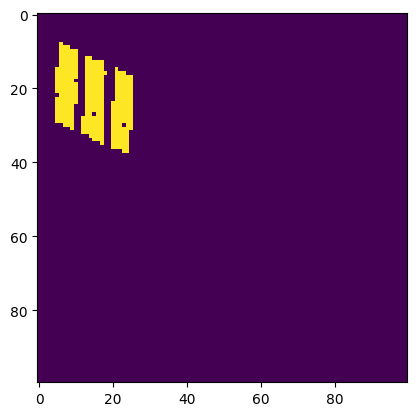

In [5]:
plt.imshow(mask_ds["OZBarley1_layout"])
plt.show()

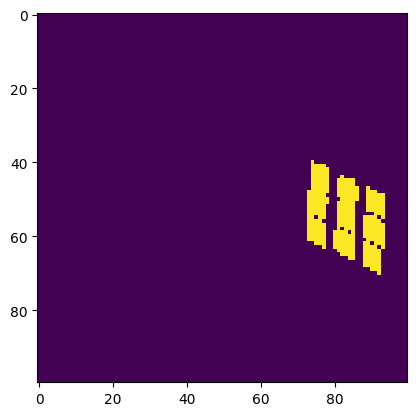

In [6]:
plt.imshow(mask_ds["OZBarley2_layout"])
plt.show()

### Load data groupby id with id provided

In [7]:
id_ds = stac_load_vector([area1, area2], gbox, "id", ["OzB"])
id_ds

<xarray.Dataset> Size: 162kB
Dimensions:               (y: 100, x: 100)
Coordinates:
  * y                     (y) float64 800B -35.05 -35.05 ... -35.05 -35.05
  * x                     (x) float64 800B 147.3 147.3 147.3 ... 147.3 147.3
    spatial_ref           int32 4B 4326
Data variables:
    OZBarley1_layout_OzB  (y, x) int64 80kB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    OZBarley2_layout_OzB  (y, x) int64 80kB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
Attributes:
    legend:   {'OZBarley1_layout_OzB': {'OzB_144': 0, 'OzB_112': 1, 'OzB_051'...

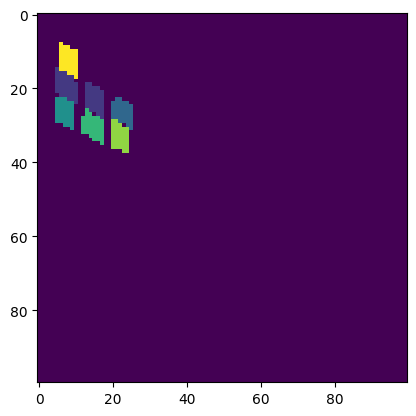

In [8]:
plt.imshow(id_ds["OZBarley1_layout_OzB"])
plt.show()

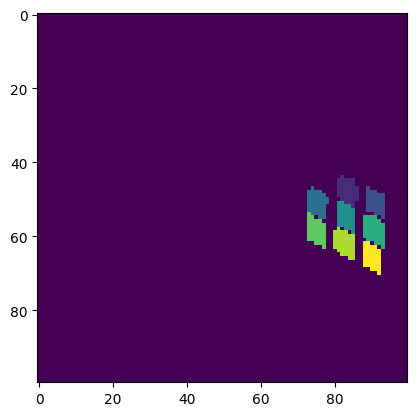

In [9]:
plt.imshow(id_ds["OZBarley2_layout_OzB"])
plt.show()

### Load data groupby field

In [10]:
feature_ds = stac_load_vector([area1, area2], gbox, "field", ["OzB"])
feature_ds

<xarray.Dataset> Size: 82kB
Dimensions:      (y: 100, x: 100)
Coordinates:
  * y            (y) float64 800B -35.05 -35.05 -35.05 ... -35.05 -35.05 -35.05
  * x            (x) float64 800B 147.3 147.3 147.3 147.3 ... 147.3 147.3 147.3
    spatial_ref  int32 4B 4326
Data variables:
    OzB          (y, x) int64 80kB 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Attributes:
    legend:   {'OzB': {'OzB_144': 0, 'OzB_112': 1, 'OzB_051': 2, 'OzB_241': 3...

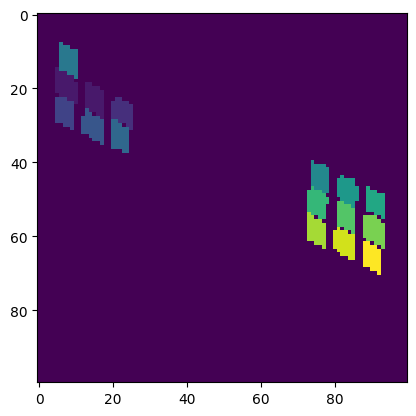

In [11]:
plt.imshow(feature_ds["OzB"])
plt.show()